## Task no 1. 
Compare the visualizations obtained from PCA and t-SNE. 

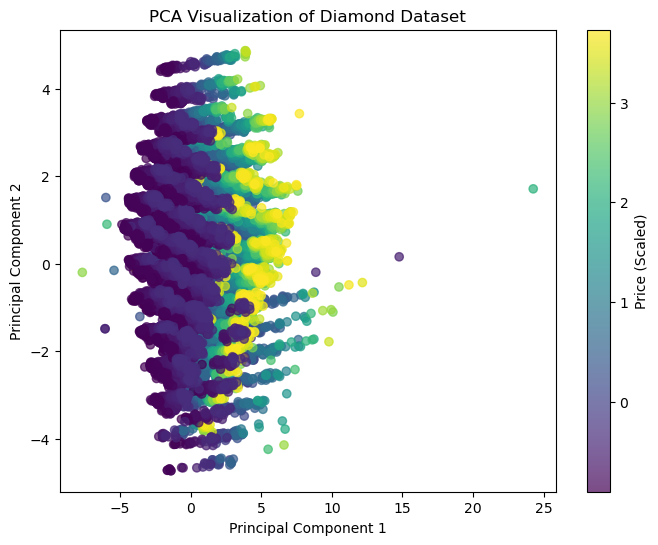

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the Diamond dataset
diamonds = sns.load_dataset('diamonds')
diamonds.dropna(inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler
categorical_cols = ['cut', 'color', 'clarity']
for col in categorical_cols:
    diamonds[col] = LabelEncoder().fit_transform(diamonds[col])

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
diamonds[numerical_cols] = scaler.fit_transform(diamonds[numerical_cols])

# Prepare data for dimensionality reduction
X = diamonds.drop('price', axis=1)  # Features
y = diamonds['price']

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Price (Scaled)')
plt.title('PCA Visualization of Diamond Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [7]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Price (Scaled)')
plt.title('t-SNE Visualization of Diamond Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


KeyboardInterrupt: 

## Task no 2.
Assess the performance of a classification model trained on the original high-dimensional 
data versus the reduced-dimensional data using PCA.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Convert target (price) into binary classification: Is price above median?
y_class = (y > y.median()).astype(int)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Train logistic regression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)

# Evaluate performance
y_pred = logreg.predict(X_test)
print("Performance on Original Data:")
print(classification_report(y_test, y_pred))


Performance on Original Data:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5404
           1       0.96      0.96      0.96      5384

    accuracy                           0.96     10788
   macro avg       0.96      0.96      0.96     10788
weighted avg       0.96      0.96      0.96     10788



In [4]:
# Train-Test Split for PCA-reduced data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_class, test_size=0.2, random_state=42)

# Train logistic regression
logreg_pca = LogisticRegression(max_iter=500)
logreg_pca.fit(X_train_pca, y_train_pca)

# Evaluate performance
y_pred_pca = logreg_pca.predict(X_test_pca)
print("Performance on PCA-Reduced Data:")
print(classification_report(y_test_pca, y_pred_pca))


Performance on PCA-Reduced Data:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      5404
           1       0.86      0.85      0.85      5384

    accuracy                           0.86     10788
   macro avg       0.86      0.86      0.86     10788
weighted avg       0.86      0.86      0.86     10788



## Task no 3.
Calculate and plot the explained variance ratio for each principal component to 
understand the amount of variance captured by each component.

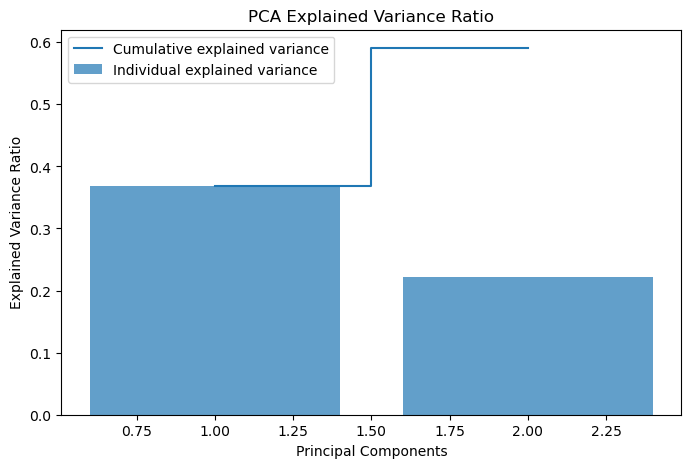

In [5]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.legend(loc='best')
plt.show()


## Task no 4. 
Compare the classification performance of models trained on data with and without 
dimensionality reduction (using PCA and t-SNE).

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report

# Load dataset
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds.dropna(inplace=True)

# Encode categorical features
categorical_cols = ['cut', 'color', 'clarity']
for col in categorical_cols:
    diamonds[col] = LabelEncoder().fit_transform(diamonds[col])

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
diamonds[numerical_cols] = scaler.fit_transform(diamonds[numerical_cols])

# Prepare features and target
X = diamonds.drop('price', axis=1)  # Features
y = (diamonds['price'] > 0).astype(int)  # Binary target (price > average)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Logistic Regression on original data
logreg_original = LogisticRegression(max_iter=500)
logreg_original.fit(X_train, y_train)

# Predict and evaluate
y_pred_original = logreg_original.predict(X_test)
print("Performance on Original Data:")
print(classification_report(y_test, y_pred_original))


Performance on Original Data:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6899
           1       0.93      0.95      0.94      3889

    accuracy                           0.96     10788
   macro avg       0.95      0.96      0.95     10788
weighted avg       0.96      0.96      0.96     10788



In [10]:
# Apply PCA
pca = PCA(n_components=5)  # Retain 5 principal components
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

# Logistic Regression on PCA-reduced data
logreg_pca = LogisticRegression(max_iter=500)
logreg_pca.fit(X_pca_train, y_train)

# Predict and evaluate
y_pred_pca = logreg_pca.predict(X_pca_test)
print("\nPerformance on PCA-Reduced Data:")
print(classification_report(y_test, y_pred_pca))



Performance on PCA-Reduced Data:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6899
           1       0.93      0.96      0.94      3889

    accuracy                           0.96     10788
   macro avg       0.95      0.96      0.96     10788
weighted avg       0.96      0.96      0.96     10788



In [11]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne_train = tsne.fit_transform(X_train)
X_tsne_test = tsne.fit_transform(X_test)

# Logistic Regression on t-SNE-reduced data
logreg_tsne = LogisticRegression(max_iter=500)
logreg_tsne.fit(X_tsne_train, y_train)

# Predict and evaluate
y_pred_tsne = logreg_tsne.predict(X_tsne_test)
print("\nPerformance on t-SNE-Reduced Data:")
print(classification_report(y_test, y_pred_tsne))


KeyboardInterrupt: 

## Task no 5. 
Choose a new dataset and apply dimensionality reduction techniques (PCA and t-SNE). 
Compare and visualize the results as done previously.

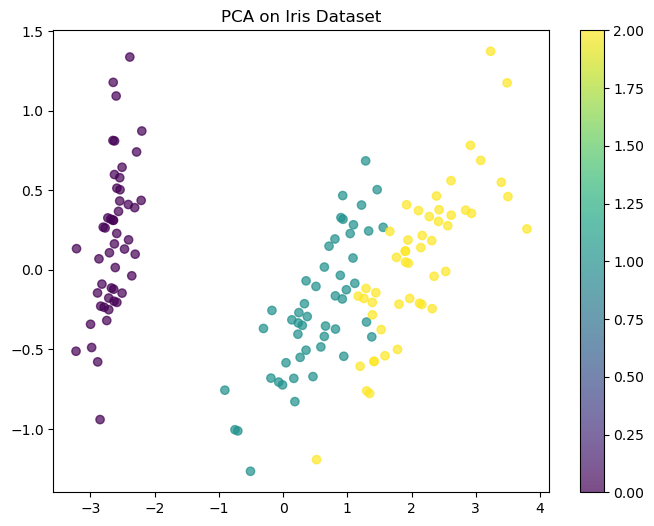

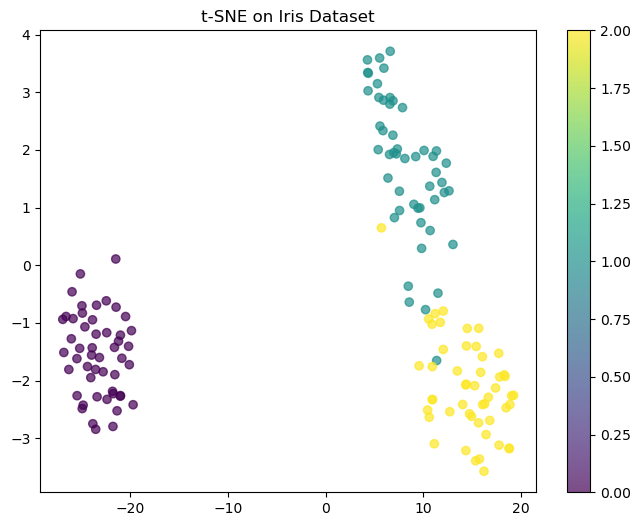

In [6]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Apply PCA
pca_iris = PCA(n_components=2)
X_iris_pca = pca_iris.fit_transform(X_iris)

# Apply t-SNE
X_iris_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_iris)

# Visualize PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=y_iris, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('PCA on Iris Dataset')
plt.show()

# Visualize t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_iris_tsne[:, 0], X_iris_tsne[:, 1], c=y_iris, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('t-SNE on Iris Dataset')
plt.show()
